## 10 Intro to ANN with Keras

    10.1 From Biological to Artificial Neurons
        - Biological Neurons

In [2]:
# Setup 

# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

### 10.4 Perceptrons

In [3]:
import numpy as np

from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


# data
iris = load_iris()
X = iris.data[:, (2,3)] # only columns pedal length and width
y = (iris.target == 0).astype(np.int)


# set up Perceptron clf
per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

# predict
per_clf.predict([[2, 0.5]])

array([1])

Saving figure perceptron_iris_plot


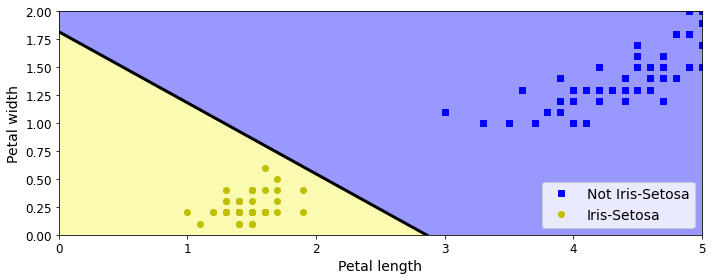

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

### Activation Functions

- Relu 
- sigmond (logistic) - 0 to 1
- tanh (hyperbolic tangent function from -1 to 1)
- step function (not possible for Gradient Descent since 'jump at "0"', GD needs increment change to work)
- derivates 

different acti. func for hidden layer and output layer possible (depending on task)



Saving figure activation_functions_plot


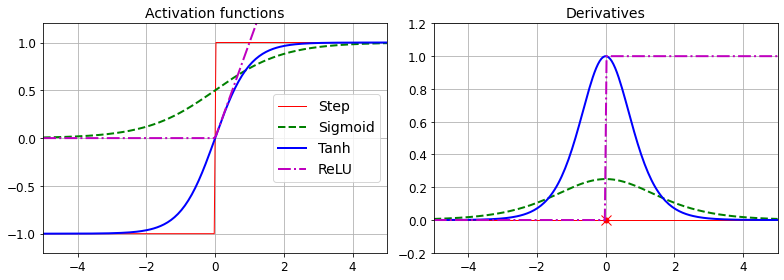

In [6]:
# Visualization of diff. activ. functions


def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)



z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

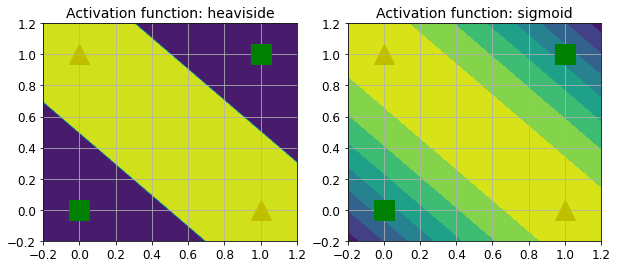

In [7]:
# Visualization of simple logistic 'exclusive and' calculation with heaviside and sigmoid activ.

def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)


x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

## 10.2.2 Building an Image Classification Model w/  Sequential API


In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
# check the versions

tf.__version__

'2.1.0'

In [10]:
keras.__version__

'2.2.4-tf'

In [49]:
### Fashion MNIST Dataset (60000 grayscale image, 40 classes, 28x28 pixels each)

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()


In [50]:
# check the shapes of sets

X_train_full.shape
X_valid.shape
X_test.shape

(10000, 28, 28)

In [52]:
# data type of sets (unlike import with sklearn integer and not 1d array 784)
X_train_full.dtype

dtype('uint8')

In [53]:
# split train data so we have valid set
# scale pixel intensity to range 0-1 (divide by 255)
# since each pixel intensity is represented by a byte (0-255)

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

X_test = X_test / 255.

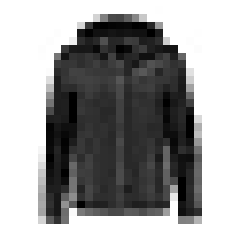

In [54]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [55]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# class names of the labels y_train

In [56]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [58]:
class_names[y_train[1]]

'T-shirt/top'

In [59]:
# set up sequential model (quite verbose version)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax')) # since 10 labels 10 output neurons


In [60]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [61]:

# inspect the Model with following attributes

model.layers

#  model.summary()

# keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

model.layers[1].name

hidden1 = model.layers[1]

hidden1.get_weights() # first array weights shape(784, 300), then biases shape(300,)

[array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
          0.03859074, -0.06889391],
        [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
         -0.02763776, -0.04165364],
        [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
          0.07121518, -0.07331658],
        ...,
        [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
          0.00228987,  0.05581069],
        [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
          0.00034875,  0.02878492],
        [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
          0.00272203, -0.06793761]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [62]:
# step 2 : compile

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='sgd',
             metrics=['accuracy'])


In [63]:
# step 3 : train

history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))


Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 9s 160us/sample - loss: 0.7226 - accuracy: 0.7642 - val_loss: 0.5075 - val_accuracy: 0.8314
Epoch 2/30
55000/55000 [==============================] - 8s 154us/sample - loss: 0.4843 - accuracy: 0.8321 - val_loss: 0.4538 - val_accuracy: 0.8486
Epoch 3/30
55000/55000 [==============================] - 8s 141us/sample - loss: 0.4413 - accuracy: 0.8465 - val_loss: 0.4385 - val_accuracy: 0.8490
Epoch 4/30
55000/55000 [==============================] - 7s 134us/sample - loss: 0.4128 - accuracy: 0.8549 - val_loss: 0.4163 - val_accuracy: 0.8562
Epoch 5/30
55000/55000 [==============================] - 8s 139us/sample - loss: 0.3926 - accuracy: 0.8617 - val_loss: 0.3817 - val_accuracy: 0.8636
Epoch 6/30
55000/55000 [==============================] - 8s 142us/sample - loss: 0.3770 - accuracy: 0.8667 - val_loss: 0.3729 - val_accuracy: 0.8680
Epoch 7/30
55000/55000 [===========================

In [36]:
# data from history obejct

history.epoch

history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [37]:
# plot the models history with accuracz and loss of training and validation

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))

plt.grid(True)
plt.gca().set_ylim(0, 1)

save_fig("keras_learning_curves_plot")

plt.show()

ModuleNotFoundError: No module named 'pandas'

In [40]:
# step 4 : evaluate model

model.evaluate(X_test, y_test)

10000/10000 [==============================] - 1s 107us/sample - loss: 7588.3386 - accuracy: 0.1000


[7588.3386484375, 0.1]

In [43]:
# predict new instances (we pretend that X_test data as new instances)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [64]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

## 10.2.3 Regression MLP



In [70]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.fit(X_valid)
X_test = scaler.fit(X_test)


In [71]:
np.random.seed(42)
tf.random.set_seed(42)

# step 1 : Set up Model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])


# step 2 : compile
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

# step 3 : train
history = model.fit(X_train, y_train, epochs=20,
         validation_data=(X_valid, y_valid))

# step 4 : evaluate & predict new instances
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_test[:3])


ValueError: Failed to find data adapter that can handle input: <class 'sklearn.preprocessing._data.StandardScaler'>, <class 'numpy.ndarray'>